## Вступление

Эта работа посвящена рассмотрению понятия асимптотической сложности алгоритмов на конкретных примерах. Грубо говоря, асимптотическая сложность алгоритма — это количество операций, из которых этот алгоритм состоит. В ходе работы вы напишете несколько различных алгоритмов, которые в силу различной вычислительной сложности будут выполняться за разное количество времени.


## Начало работы

Эта работа выполняется при помощи **Jupyter Notebook** — интерактивной «тетрадки», которая позволяет хранить текст, код, графики и т.д.

Первым делом подключим необходимые нам модули:

In [22]:
import matplotlib
import random
import math
import util
%matplotlib inline

Мы не будем детально останавливаться на том, за что именно отвечают эти модули, поскольку к самой работе это имеет весьма опосредованное отношение.

# Задача «для разогрева»

### Задание №1: числа Фибоначчи

Напишите рекурсивную реализацию функции, вычисляющей числа Фибоначчи. Для этого допишите тело функции ниже:

In [2]:
def recursive_fib(n):
    if n <= 1:
        return n
    return recursive_fib(n-1) + recursive_fib(n-2)

Проверьте, что функция работает корректно:

In [3]:
assert recursive_fib(0) == 0
assert recursive_fib(1) == 1
assert recursive_fib(9) == 34

Теперь напишите рекурсивную реализацию, но с использованием дополнительного массива в роли кэша, в котором хранятся уже вычисленные значения:

In [4]:
def recursive_fib_with_cache(n, cache=None):
    if n <= 1:
        return n
    cache = recursive_fib(n-1) + recursive_fib(n-2)
    return cache

Убедитесь, что функция работает корректно:

In [5]:
assert recursive_fib(0) == 0
assert recursive_fib(1) == 1
assert recursive_fib(9) == 34

И, наконец, напишите нерекурсивную реализацию функции:

In [6]:
def fib(n):
    f = 0
    for i in range(n+1):
        f += i
    return f

Проверьте правильность реализации:

In [7]:
assert recursive_fib(0) == 0
assert recursive_fib(1) == 1
assert recursive_fib(9) == 34

А теперь давайте посмотрим на скорость работы написанных выше функций:

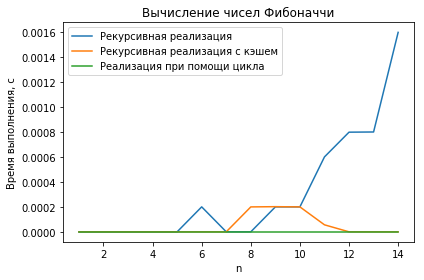

In [8]:
util.plot_fib_results(
    ('Рекурсивная реализация', recursive_fib),
    ('Рекурсивная реализация с кэшем', recursive_fib_with_cache),
    ('Реализация при помощи цикла', fib)
)

Можно видеть, что самой быстрой является реализация при помощи цикла.
**Вопрос**: какова асимптотическая сложность реализованных алгоритмов?

# Сортировки

Здесь и далее мы предполагаем, что все функции сортировки упорядочивают исходный массив по возрастания. Функции сортировки в этой работе должны изменять переданный массив, а не возвращать новый.

### Задание №2: сортировка пузырьком

Напишите обычную реализацию сортировки пузырьком:

In [17]:
def bubble_sort(a):
    N = len(a)
    for bypass in range(1, N):
        for k in range (0, N-bypass):
            if a[k] > a[k+1]:
                a[k], a[k+1] = a[k+1], a[k]

Убедитесь, что сортировка написана верно:

In [18]:
a = [5, 4, 3, 2, 1]
b = [1, 2, 3, 5, 1, 6, 7, 8, 3, 4, 3, 0, 1, 2, 6, 1, 2, 3]
bubble_sort(a)
bubble_sort(b)
assert util.is_sorted(a)
assert util.is_sorted(b)

Особенность обычной реализации пузырьковой сортировки состоит в том, что она «не замечает» отсортированности массива. Это означает, что даже если массив уже отсортирован, алгоритм всё равно будет выполнен от начала и до конца. Чтобы этого избежать, можно добавить специальный флаг, показывающий, была ли за прошлый проход выполнена хоть одна перестановка. Если перестановок не было, значит, массив уже отстортирован. Напишите улучшенную реализацию сортировки пузырьком:

In [19]:
def bubble_sort_adaptive(a):
    N = len(a)
    f = True
    for bypass in range(1, N):
        if f:
            f = False
            for k in range (0, N-bypass):
                if a[k] > a[k+1]:
                    a[k], a[k+1] = a[k+1], a[k]
                    f = True

Проверьте свою реализацию:

In [20]:
a = [5, 4, 3, 2, 1]
b = [1, 2, 3, 5, 1, 6, 7, 8, 3, 4, 3, 0, 1, 2, 6, 1, 2, 3]
bubble_sort_adaptive(a)
bubble_sort_adaptive(b)
assert util.is_sorted(a)
assert util.is_sorted(b)

А теперь сравните скорость работы двух реализаций одного алгоритма при различных входных данных:

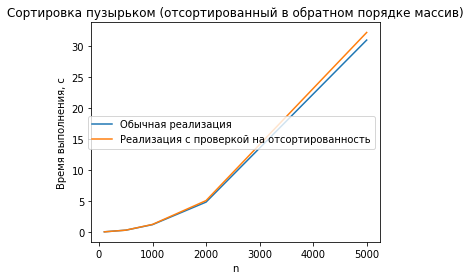

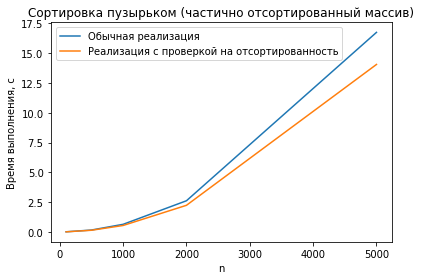

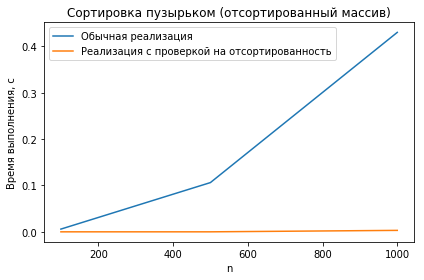

In [21]:
util.plot_bubble_sort_results(
    ('Обычная реализация', bubble_sort),
    ('Реализация с проверкой на отсортированность', bubble_sort_adaptive)
)

**Вопрос**: какие выводы можно сделать из полученных результатов?

### Задание №3: быстрая сортировка

Напишите реализацию быстрой сортировки, использую первый элемент в качестве опорного.

In [ ]:
def quick_sort_first(a):
    if len(a) < 2:
        return a
    return quick_sort_first([val for val in a if val <= a[0]]) + [a[0]] + quick_sort_first([val for val in a if val > a[0]])

Проверьте свою реализацию:

In [ ]:
a = [5, 4, 3, 2, 1]
b = [1, 2, 3, 5, 1, 6, 7, 8, 3, 4, 3, 0, 1, 2, 6, 1, 2, 3]
quick_sort_first(a)
quick_sort_first(b)
assert util.is_sorted(a)
assert util.is_sorted(b)

Как вы знаете, скорость работы алгоритма быстрой сортировки напрямую зависит от способа выбора опорного элемента. Поэтому реализуем ещё два варианта. Сначала будем выбирать в качестве опорного элемента средний:

In [25]:
def quick_sort_middle(a):
    if len(a) <= 1:
        return
    barrier = a[len(a)//2]
    L = []             
    M = []
    R = []
    for x in a:
        if x < barrier:
            L.append(x)
        elif x == barrier:
            M.append(x)
        else: # x > barrier
            R.append(x)
    quick_sort_first(L)
    quick_sort_first(R)
    k = 0
    for x in L+M+R: 
        a[k] = x
        k += 1

Проверяем реализацию:

In [26]:
a = [5, 4, 3, 2, 1]
b = [1, 2, 3, 5, 1, 6, 7, 8, 3, 4, 3, 0, 1, 2, 6, 1, 2, 3]
quick_sort_middle(a)
quick_sort_middle(b)
assert util.is_sorted(a)
assert util.is_sorted(b)

А теперь в качестве опорного элемента выбираем произвольный элемент (при помощи вызова `random.choice(a)`):

In [37]:
def quick_sort_random(a):
    if len(a) < 2:
        return a
    barrier = random.choice(a)
    return quick_sort_random([val for val in a if val < barrier]) + [barrier] + quick_sort_random([val for val in a if val > barrier])

Проверяем реализацию:

In [38]:
a = [5, 4, 3, 2, 1]
b = [1, 2, 3, 5, 1, 6, 7, 8, 3, 4, 3, 0, 1, 2, 6, 1, 2, 3]
quick_sort_random(a)
quick_sort_random(b)
assert util.is_sorted(a)
assert util.is_sorted(b)

AssertionError: 

Сравним скорости работы трёх реализаций на различных входных данных:

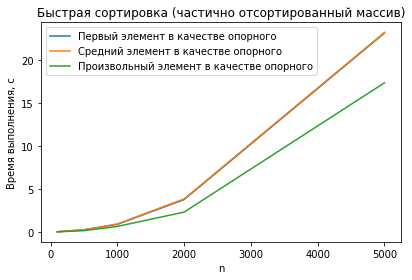

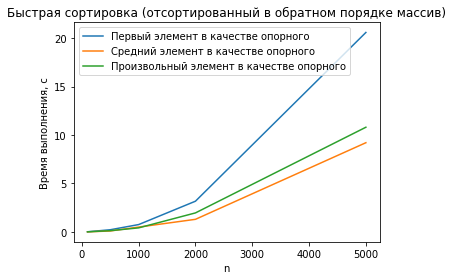

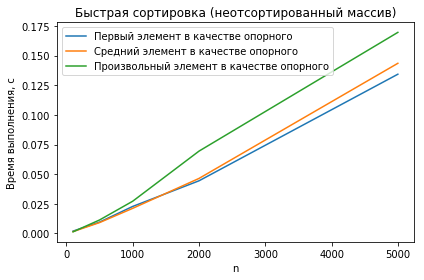

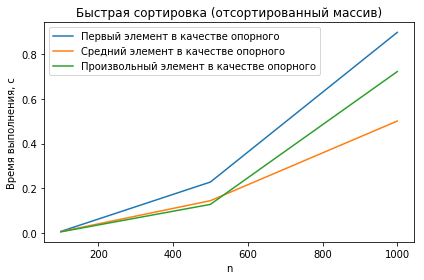

In [29]:
util.plot_quick_sort_results(
    ('Первый элемент в качестве опорного', quick_sort_first),
    ('Средний элемент в качестве опорного', quick_sort_middle),
    ('Произвольный элемент в качестве опорного', quick_sort_random)
)

**Вопрос**: какую асимптотическую сложность имеют эти реализации на разных входных данных? Чем это объясняется?

### Задание №4: сортировка слиянием

Напишите реализацию сортировки слиянием:

In [32]:
def merge(a, b):
    C = []
    i = k = 0
    while i < len(a) and k < len(b):
        if a[i] <= b[k]:               
            C.append(a[i])
            i += 1
        else:
            C.append(b[k])
            k += 1
    while i < len(a):                   
        C.append(a[i])
        i += 1
    while k < len(b):                   
        C.append(b[k])
        k += 1
    return C


def merge_sort(a):
    if len(a) <= 1:
        return
    middle = len(a)//2
    L = [a[i] for i in range(middle)]
    R = [a[i] for i in range(middle, len(a))]
    merge_sort(L)
    merge_sort(R)
    C = merge(L, R)
    for i in range(len(a)):
        a[i] = C[i]

Проверьте корректность реализации:

In [33]:
a = [5, 4, 3, 2, 1]
merge_sort(a)
assert util.is_sorted(a)

А теперь сравним скорость работы трёх написанных нами алгоритмов:

In [ ]:
util.plot_sort_results(
    ('Быстрая сортировка: произвольный элемент в качестве опорного', quick_sort_random),
    ('Сортировка слиянием', merge_sort),
    ('Сортировка пузырьком: обычная реализация', bubble_sort),
)
util.plot_sort_results(
    ('Быстрая сортировка: первый элемент в качестве опорного', quick_sort_first),
    ('Сортировка слиянием', merge_sort),
    ('Сортировка пузырьком: пеализация с проверкой на отсортированность', bubble_sort),
)

**Вопрос**: какие выводы можно сделать из полученных результатов? В чём принципиальное отличие сортировки слиянием от двух других рассмотренных?

# Поиск элемента

Теперь перейдём к алгоритмам поиска элемента в массиве.

### Задание №5: линейный поиск

Для начала напишите самую простую реализацию поиска — линейный поиск элемента в массиве:

In [53]:
def search(a, x):
    for index, item in enumerate(a):
        if item == x:
            return index
    return None

Проверьте корректность реализации:

In [54]:
assert search([1, 2, 3, 4, 5], 5)  == 4
assert search([1, 2, 3, 4, 5], 3)  == 2

Когда нам ничего не известно о данных, которые находятся в массиве, придумать какой-то более эффективный алгоритм достаточно сложно. Но если мы знаем какую-то дополнительную информацию о природе данных в массиве, то можно написать более эффективные алгоритмы.

### Задание №6: двоичный поиск

Если массив упорядочен, то для такого массива можно написать эффективный алгоритм поиска — двоичный (или *бинарный*) поиск. Напишите реализацию этого алгоритма:

In [57]:
def binary_search(a, x):
    left = 0
    right = len(a) - 1
    while left <= right:
        midpoint = (left + right) // 2
        current_item = a[midpoint]
        if current_item == x:
            return midpoint
        else:
            if x < current_item:
                right = midpoint - 1
            else:
                left = midpoint + 1
    return None

Проверьте корректность реализации:

In [58]:
assert binary_search([1, 2, 3, 4, 5], 5)  == 4
assert binary_search([1, 2, 3, 4, 5], 3)  == 2
assert binary_search([1, 2, 3, 4, 5], 1)  == 0

### Задание №7: интерполяционный поиск

Если кроме упорядоченности про массив известно, как именно возрастают (убывают) в нём элементы, то алгоритм двоичного поиска можно существенно улучшить. Вместо деления отрезка пополам можно выполнить интерполяцию и получить приблизительное положение элемента в массиве. Такая модификация будет называться *интерполяционным поиском*. Напишите реализацию алгоритма интерполяционного поиска, предполагая, что элементы в массиве возрастают линейно:

In [59]:
def interpolation_search(a, x):
    left = 0
    right = len(a) - 1
    while left <= right:
        point = left + ((x - a[left]) * (right - left)) // (a[right] - a[left])
        if point < 0 or point >= len(a):
            return None
        current_item = a[point]
        if current_item == x:
            return point
        else:
            if x < current_item:
                right = point - 1
            else:
                left = point + 1
    return None

Проверьте свою реализацию:

In [60]:
assert interpolation_search([1, 2, 3, 4, 5], 5)  == 4
assert interpolation_search([1, 2, 3, 4, 5], 3)  == 2
assert interpolation_search([1, 2, 3, 4, 5], 1)  == 0

Сравните скорость работы трёх алгоритмов поиска на разных входных данных:

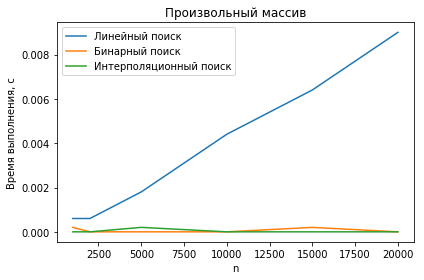

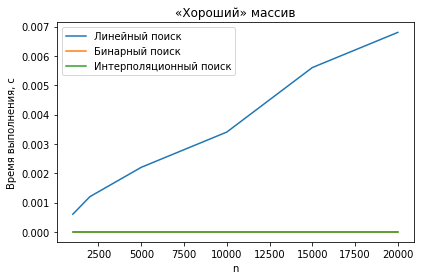

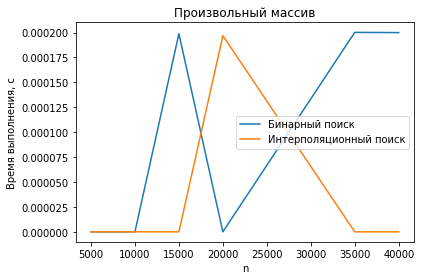

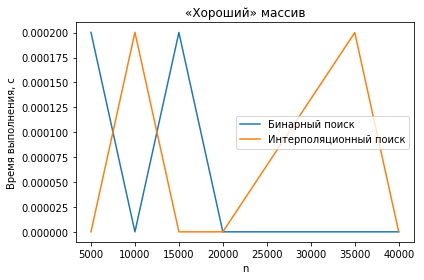

In [61]:
util.plot_search_results_small(
    ('Линейный поиск', search),
    ('Бинарный поиск', binary_search),
    ('Интерполяционный поиск', interpolation_search),
)
util.plot_search_results_huge(
    ('Бинарный поиск', binary_search),
    ('Интерполяционный поиск', interpolation_search),
)

**Вопрос**: что можно сказать об алгоритме интерполяционного поиска? Когда имеет смысл его применять?

## Дополнительное задание

Если у вас осталось время, то напишите реализацию сортировки слияением с разбиением исходного массива на 3 части. Сравните скорость работы двух реализаций.